In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error , r2_score

from sklearn.datasets import fetch_california_housing

In [51]:
# load dataset
husing = fetch_california_housing(as_frame=True) # as_frame = pandas Dataframe
husing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [52]:
X = husing.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [53]:
y = husing.target
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [54]:
print(X.shape)
print('Target Name = ',husing.target_names)

(20640, 8)
Target Name =  ['MedHouseVal']


In [55]:
# train test split = 80/20
X_train , X_test , y_train , y_test = train_test_split(
    X,y,
    test_size=0.20,
    random_state=42
)

In [56]:
print(f'Training Sample = {X_train.shape[0]:,}')
print(f'Testing Sample = {X_test.shape[0]:,}')

Training Sample = 16,512
Testing Sample = 4,128


In [57]:
# train Gradient Boosting model
gb = GradientBoostingRegressor(
    learning_rate=0.05, # small step 
    n_estimators=150, # number of tree
    subsample=0.8, # use 80% row per tree 
    max_depth=4, # shallow tree work best in boosting 
    random_state=42,
    verbose=1, # shows progress
)

In [58]:
gb.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2528           0.0814           22.46s
         2           1.1891           0.0935           17.28s
         3           1.1246           0.0608           15.01s
         4           1.0746           0.0896           13.92s
         5           1.0225           0.0548           13.85s
         6           0.9702           0.0316           13.08s
         7           0.9324           0.0697           13.03s
         8           0.8812          -0.0022           12.79s
         9           0.8508           0.0668           12.33s
        10           0.8127           0.0197           11.93s
        20           0.5768          -0.0015           10.02s
        30           0.4703           0.0296            8.78s
        40           0.3956          -0.0419            7.77s
        50           0.3552           0.0231            6.90s
        60           0.3261           0.0297            6.04s
       

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=150,
                          random_state=42, subsample=0.8, verbose=1)

In [59]:
# predictions & avaluation
y_pred = gb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("\n"+"="*50)
print(f"RMSE : {rmse:.3f} (in $100,000 units)")
print(f"R : {r2:.3f} (explains{r2*100:.1f}%) of variance")


RMSE : 0.521 (in $100,000 units)
R : 0.793 (explains79.3%) of variance


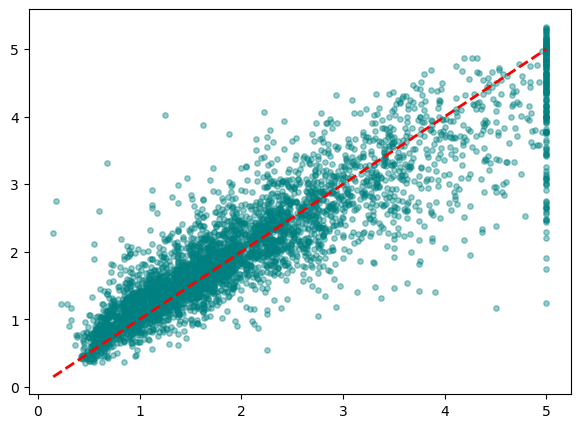

In [60]:
# visualizations 
plt.figure(figsize=(7,5))
plt.scatter(y_test,y_pred,alpha=0.4,s=15,color='teal')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',lw=2)
plt.show()

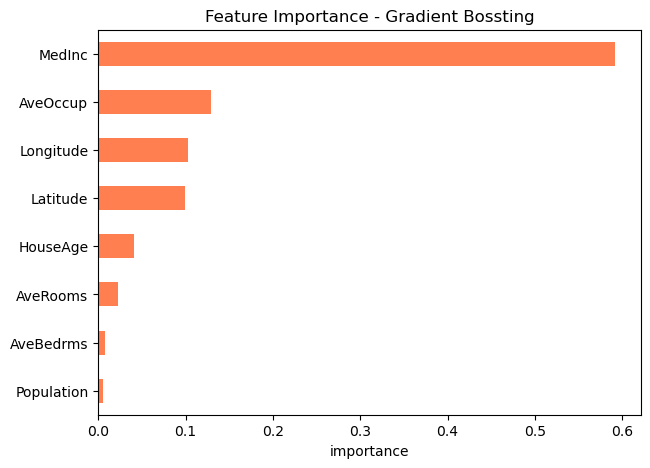

In [64]:
# Feature importrance

importances = pd.Series(gb.feature_importances_,index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh',color='coral',figsize=(7,5))
plt.title("Feature Importance - Gradient Bossting")
plt.xlabel("importance")
plt.show()